# DataViz - Projet: Twitter Sentiment Analysis

### Importation des packages nécessaires

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from datetime import datetime
import re  
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud
from PIL import Image
from collections import Counter
from bokeh.plotting import figure
from bokeh.io import  push_notebook,output_notebook, show
output_notebook()
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

/Users/PhuocNhatDANG/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Loading BokehJS ...

# I. Importation du jeu de données

In [3]:
data = pd.read_csv('data/data_raw/twitter_comment.csv',encoding = "ISO-8859-1",
                 names = ["target", "ids", "date", "flag", "user", "text"])

In [4]:
data.shape

(1600000, 6)

In [7]:
data.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [8]:
data.tail(10)

,target,ids,date,flag,user,text
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


# II. Traitement des données
    1. Traitement de la variable "date"
    2. Traitement du texte des tweets

## 1. Traitement de la variable "date"

Ajout de colonnes représentant : l'heure, le jour et le mois: 

In [12]:
data['date'] = data['date'].apply(lambda x: datetime.strptime(x,"%a %b %d %H:%M:%S PDT %Y"))

In [13]:
data['day'] = pd.to_datetime(data['date'])
data['day'] = data['day'].apply(lambda x: x.weekday())

data['month'] = pd.to_datetime(data['date'])
data['month'] = data['month'].apply(lambda x: x.month)

data['time'] = pd.to_datetime(data['date'])
data['time'] = data['time'].apply(lambda x: x.time())

data['hour'] = pd.to_datetime(data['date'])
data['hour'] = data['hour'].apply(lambda x: x.hour)

In [14]:
data.head()

,target,ids,date,flag,user,text,day,month,time,hour
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,4,22:19:45,22
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0,4,22:19:49,22
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0,4,22:19:53,22
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0,4,22:19:57,22
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0,4,22:19:57,22


Transformation de la variable heure du tweet en 6 segments comme suit:
    + 4h ->  8h:  Early Morning
    + 8h ->  12h:   Morning
    + 12h ->  16h:  Noon
    + 16h ->  20h:  Evening
    + 20h ->  24h:  Night
    + 0h -> 4h:  Late Night

In [15]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

data['time_hour'] =  data['hour'].apply(f)

In [16]:
data.head()

,target,ids,date,flag,user,text,day,month,time,hour,time_hour
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,4,22:19:45,22,Night
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0,4,22:19:49,22,Night
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0,4,22:19:53,22,Night
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0,4,22:19:57,22,Night
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0,4,22:19:57,22,Night


In [17]:
data.sort_values(by = 'date', ascending = True).head()

,target,ids,date,flag,user,text,day,month,time,hour,time_hour
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,4,22:19:45,22,Night
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0,4,22:19:49,22,Night
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0,4,22:19:53,22,Night
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0,4,22:19:57,22,Night
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0,4,22:19:57,22,Night


In [18]:
data.sort_values(by = 'date', ascending = False).head()

,target,ids,date,flag,user,text,day,month,time,hour,time_hour
799999,0,2329205794,2009-06-25 10:28:31,NO_QUERY,tpchandler,has to resit exams over summer... wishes he w...,3,6,10:28:31,10,Morning
799998,0,2329205574,2009-06-25 10:28:30,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...,3,6,10:28:30,10,Morning
799997,0,2329205473,2009-06-25 10:28:30,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad,3,6,10:28:30,10,Morning
799996,0,2329205038,2009-06-25 10:28:28,NO_QUERY,bigenya,Gmail is down?,3,6,10:28:28,10,Morning
799995,0,2329205009,2009-06-25 10:28:28,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...,3,6,10:28:28,10,Morning


**Commentaire:** _La plage de dates de notre jeu de données s'étale sur 3 mois du 6 avril au 25 juin 2009._

## 2. Traitement du texte des tweets
    + 2.1 Création du corpus des tweets
    + 2.2 Regroupement des mots du corpus dans des chaînes de caractères

On choisit 200,000 tweets du data:

In [43]:
df = pd.concat([data.iloc[0:100000,:], data.iloc[800000:900000,:]], axis = 0).reset_index(drop = True)

In [44]:
df.target.value_counts()

4    100000
0    100000
Name: target, dtype: int64

In [45]:
print("Le nombre de tweets positifs est:", (df[df.target == 4].shape[0]))
print("Le nombre de tweets négatifs est:", (df[df.target == 0].shape[0]))

Le nombre de tweets positifs est: 100000
Le nombre de tweets négatifs est: 100000


**Commentaire:** _Notre jeu de données est bien équilibré entre les tweets postifs et les tweets négatifs._

In [46]:
#Valeurs manquantes
pd.isnull(df).sum()

target       0
ids          0
date         0
flag         0
user         0
text         0
day          0
month        0
time         0
hour         0
time_hour    0
dtype: int64

**Commentaire:** _Notre jeu de données ne comporte pas de valeurs manquantes._

In [47]:
# Nombre de retweets
textes = df.text
r = re.compile(r"RT")
count = 0
for tweet in textes :
    try:  compte = r.finditer(tweet) 
    except : continue
    for m in compte:
        count += 1
            
count

0

**Commentaire:** _Il n'y donc pas de retweets dans notre jeu de données._

In [48]:
#les users qui ont le plus tweeté
data.user.value_counts().head(10)

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: user, dtype: int64

**Commentaire:** _On remarque que plusieurs internautes ont tweeté plus que d'autres comme "lost_dog" avec ses 549 tweets._

In [49]:
#les users qui ont le plus tweeté des tweets négatifs
data['user'][data.target==0].value_counts().head(10)

lost_dog           549
tweetpet           310
webwoke            264
wowlew             210
mcraddictal        210
SallytheShizzle    183
_magic8ball        136
Dogbook            133
mrs_mcsupergirl    123
nuttychris         121
Name: user, dtype: int64

**Commentaire:** _On remarque que pour certains des internautes ont le plus tweeté plus que d'autres; leurs tweets étaient tous négatifs comme "lost_dog" et "tweetpet"._

In [50]:
#les users qui ont le plus tweeté des tweets positifs
data['user'][data.target==4].value_counts().head(10)

what_bugs_u       246
DarkPiano         231
VioletsCRUK       218
tsarnick          212
keza34            211
shanajaca         204
TraceyHewins      193
ramdomthoughts    190
thisgoeshere      178
KevinEdwardsJr    171
Name: user, dtype: int64

**Commentaire:** _Au contraire, pour d'autres, leurs tweets étaient tous positifs comme "what_bugs_u"._

### 2.1 Création du corpus des tweets 

Création d'une fonction "create_corpus" pour créer le corpus des mots:  

In [19]:
def create_corpus(df):
    text = []
    for i in range(0,df.shape[0]):
        #Removing all except a-z, A-Z letters and replace by space:
        review = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", ' ', df.iloc[i])
        #Making all letters to lower case:
        review = review.lower()
        #Split the review to the list of words 
        review = review.split() 
        #Remove Stopwords__ (the, a, an, on, and, in...) 
        #and Stemming (derive the root of the word):
        ps = PorterStemmer() 
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
        #Joining the word list to a sentence (seperate by space):
        review = ' '.join(review)
        text.append(review)
    return text

Création du corpus de tous les tweets du jeu de données:

In [20]:
corpus = create_corpus(df['text'])

Création du corpus des tweets positifs: 

In [21]:
corpus_pos = create_corpus(df[df['target'] == 4]['text'])

Création du corpus des tweets négatifs:

In [22]:
corpus_neg = create_corpus(df[df['target'] == 0]['text'])

### 2.2 Regroupement des mots du corpus dans des chaînes  de caractères   <code>text</code>, <code>text_pos</code>, <code>text_neg</code>

In [23]:
text = ' '.join(corpus)
text_pos = ' '.join(corpus_pos)
text_neg = ' '.join(corpus_neg)

# III. Visualisation du jeu de données
    1. Visualisation du jeu de données data
        1.1 Distribution du nombre de tweets durant la journée
        1.2 Distribution du nombre de tweets durant la journée selon la nature du tweet
        1.3 Distribution du nombre de tweets selon le jour de la semaine
        1.4 Distribution du nombre de tweets selon le jour de la semaine et la nature du tweet
        1.5 Distribution du nombre de tweets selon l'heure du tweet
        1.6 Distribution du nombre de tweets selon l'heure du tweet et la nature du tweet
        1.7 Distribution du nombre de tweets selon le jour et l'heure du tweet 
    2. Visualisation du sous-jeu de données df
        2.1 WordCloud des tweets
        2.2 Distribution d'un mot spécifique selon l'heure et le jour de la semaine
        2.3 Histogramme du nombre de mots les plus utilisés
        2.4 Représentation avec Bokeh des mots les plus utilisés dans les tweets

## 1. Visualisation du jeu de données <code>data</code>
   Dans cette section, on a effectué des graphiques avec le jeu de données  <code>data</code> (1.6 million de tweets). 

### 1.1 Distribution du nombre de tweets durant la journée

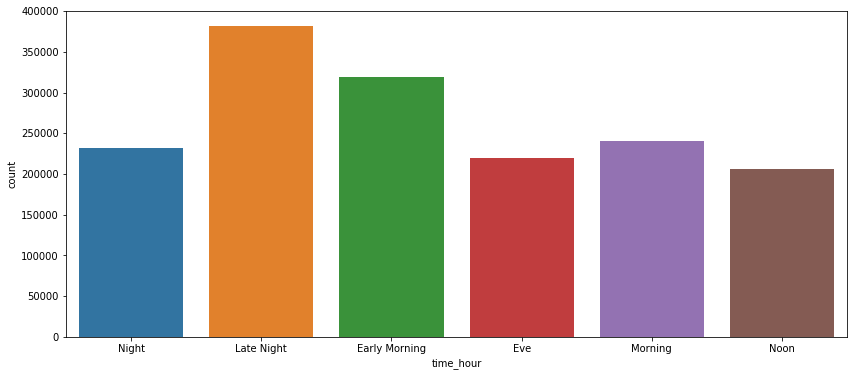

In [24]:
plt.figure(figsize=(14,6))
sns.countplot("time_hour",data=data);

**Commentaire:** _On remarque que la plupart des commentaires sont tweetés tard le soir ou au réveil._

### 1.2 Distribution du nombre de tweets durant la journée selon la nature du tweet

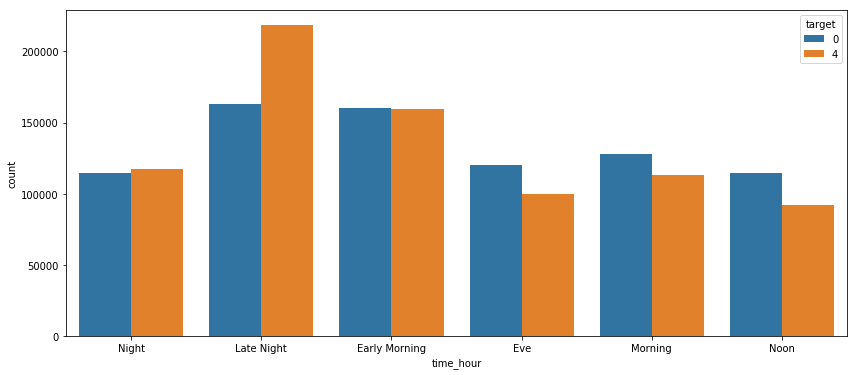

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(x= "time_hour",hue='target',data=data);

**Commentaire:** _On remarque que les tweets négatifs sont prédominants le long de la journée alors que les tweets positifs sont plus présents le soir._

### 1.3 Distribution du nombre de tweets selon le jour de la semaine

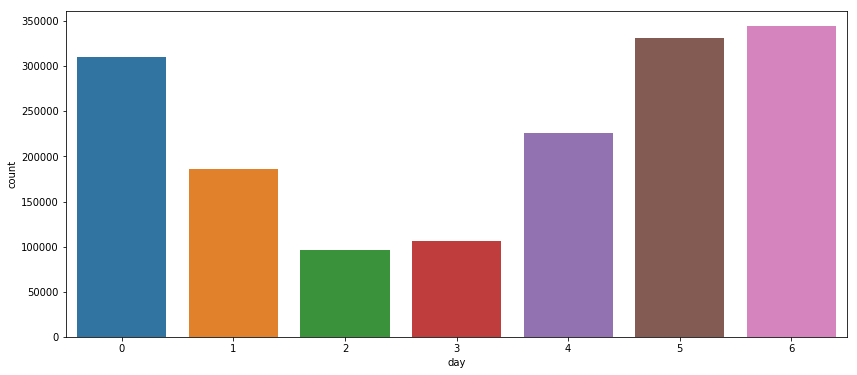

In [26]:
plt.figure(figsize=(14,6))
sns.countplot("day",data=data);

**Commentaire:** _Les internautes ont plus tweeté le week-end; ce qui est assez logique._

### 1.4 Distribution du nombre de tweets selon le jour de la semaine et la nature du tweet

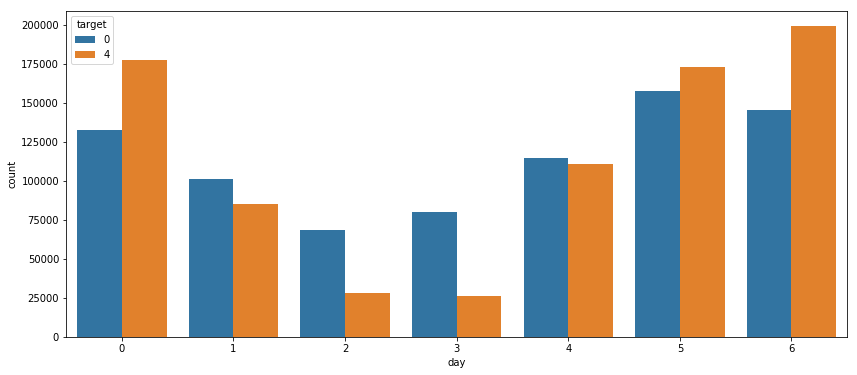

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(x= "day",hue='target',data=data);

**Commentaire:** _Les tweets sont plus de nature positive le week-end et en début de semaine (le lundi) alors qu'ils sont plus   négatifs le reste de la semaine._

### 1.5 Distribution du nombre de tweets selon l'heure du tweet

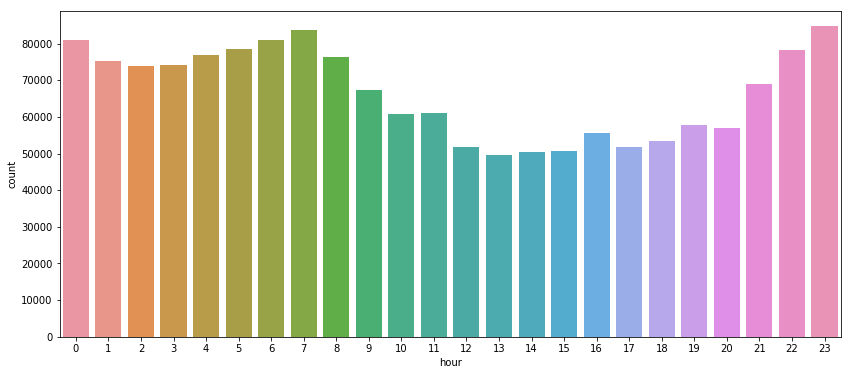

In [28]:
plt.figure(figsize=(14,6))
sns.countplot("hour",data=data);

**Commentaire:** _Les tweets sont plus postés le soir avec un pic à 23h et également au réveil avec un pic vers 7h._

### 1.6 Distribution du nombre de tweets selon l'heure du tweet et la nature du tweet

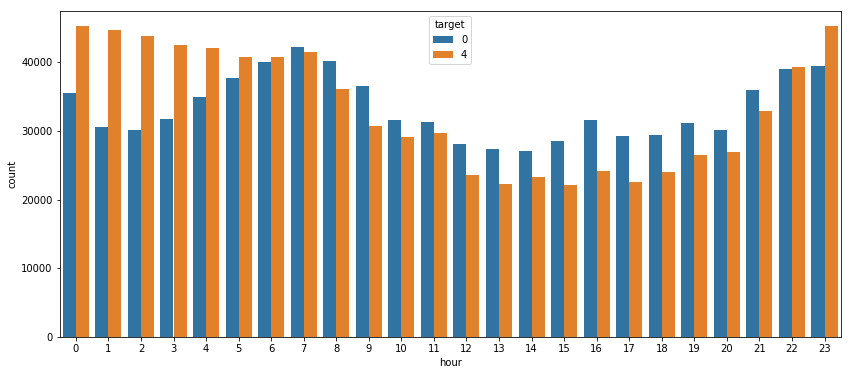

In [29]:
plt.figure(figsize=(14,6))
sns.countplot(x= "hour",hue='target',data=data);

**Commentaire:** _Les tweets sont plus de nature positive le soir à partir de 23h et la nuit jusqu'à 6h du matin alors qu'ils sont plus négatifs durant la journée._

### 1.7 Distribution du nombre de tweets selon le jour et l'heure du tweet 

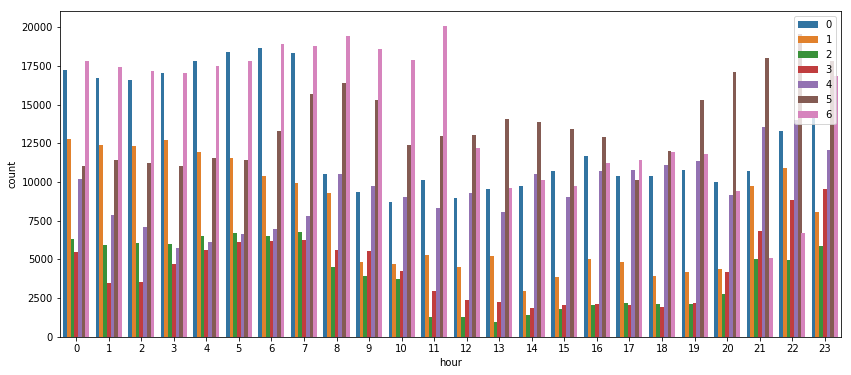

In [30]:
plt.figure(figsize=(14,6))
sns.countplot(x= "hour",hue='day',data=data);
plt.legend(loc='upper right');

**Commentaire:** _Les tweets postés la nuit sont plus ceux du week-end (la nuit du samedi au dimanche et surtout la nuit du dimanche au lundi); ceux de la matinée sont ceux du dimanche suivie par ceux du samedi et enfin les tweets de l'après-midi sont plus postés le samedi._

## 2. Visualisation du sous-jeu de données <code>df</code>
Dans cette section, on a effectué des graphiques avec le sous-jeu de données  <code>df</code> ( 200,000 tweets). 

### 2.1 WordCloud des tweets
    Dans cette section, on utilise le package WordCloud pour créer des nuages de mots à partir des textes des tweets.

####  2.1.1 WordCloud de tous les tweets avec le masque twitter 

In [31]:
stop_words = set(stopwords.words('english'))

In [32]:
def plot_word_cloud(text, masque, background_color = "white") :
    '''
    Créer des graphiques de nuages de mots à partir de la variable 'text'
    '''
    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))

    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=200, stopwords=stop_words, 
                   mask = mask_coloring, max_font_size=50, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

Le nuages de mots de tous les tweets:


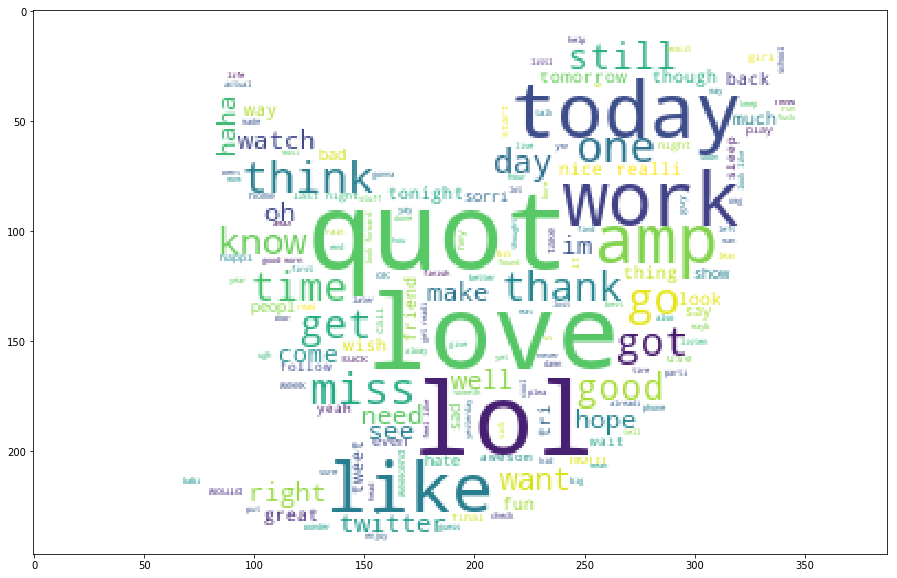

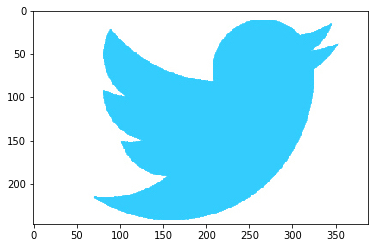

In [33]:
print('Le nuages de mots de tous les tweets:')
plot_word_cloud(text, "twitter.jpg")

# Code d'affichage du masque
import matplotlib.image as mpimg
img = mpimg.imread("twitter.jpg")
plt.imshow(img)
plt.show()

**Commentaire:** _On remarque sur le word-cloud l'existence de certains mots vides à rajouter à la liste._

In [34]:
# Ajout de mots à la liste des mots vides
stop_words.update(["today", "time","work","twitter","day"])

#### 2.1.2 WordCloud des tweets positifs avec le masque twitter 

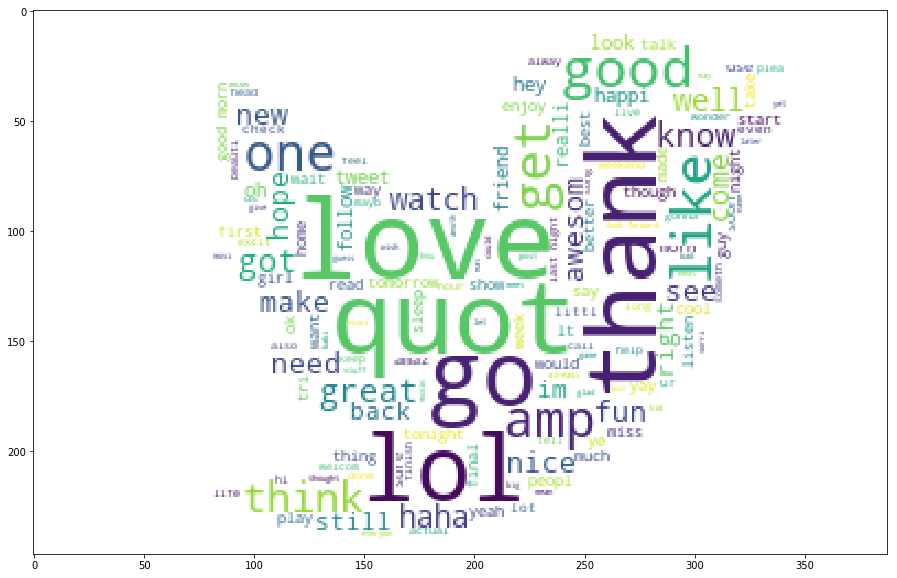

In [35]:
plot_word_cloud(text_pos, "twitter.jpg",background_color="white")

**Commentaire:** _Sur le WordCloud des tweets positifs, on remarque la prédominance de certains mots à connotation positive comme: "love","thank","like","lol","good" etc._

#### 2.1.3 WordCloud des tweets négatifs avec le masque twitter 

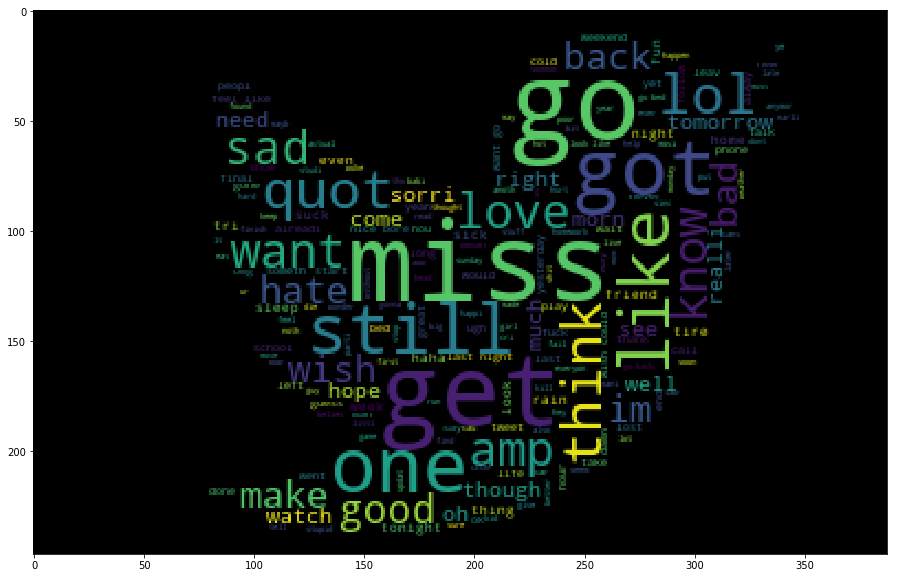

In [36]:
plot_word_cloud(text_neg, "twitter.jpg",background_color="black")

**Commentaire:** _Sur le WordCloud des tweets négatifs, on remarque la présence de certains mots à connotation négative comme: "sad", "hate", "bad" mais également d'autres à connotation négative comme "like" et "good" qui peuvent soit être précédés d'une négation soit utilisés dans un contexte ironique._

### 2.2 Distribution d'un mot spécifique selon l'heure et le jour de la semaine
    Dans cette section, nous allons définir une fonction qui permet d'afficher le nombre d'occurence d'un mot spécifique d'un tweet selon l'heure et le jour du tweet.

In [68]:
def plot_word_in_time(word):
    # Créer une liste ayant la même longueur que le 'corpus'. 
        #l[i] = 1 si 'word' est dans le tweet corpus[i], sinon, l[i]=0
    l = [1 if (word in sentence)  else 0 for sentence in corpus]
    # Ajouter la liste l comme un colonne au dataframe df
    df['Contain the word?'] = l
    
    #Graphique de la distribution du mot 'word' en fonction du jour du tweet.
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.countplot(x="day",data=df[df['Contain the word?']==1])
    plt.title('La distribution du mot ' + '"' + word + '" en fonction du jour du tweet.')
    plt.xlabel('Weekday')
    plt.ylabel('Occurence');
    #Graphique de la distribution du mot 'word' en fonction de l'heure du tweet.
    plt.subplot(122)
    sns.countplot(x="hour",data=df[df['Contain the word?']==1])
    plt.title('La distribution du mot ' + '"' + word + '" en fonction de l'+"'heure du tweet.")
    plt.xlabel('Hour')
    plt.ylabel('Occurence'); 

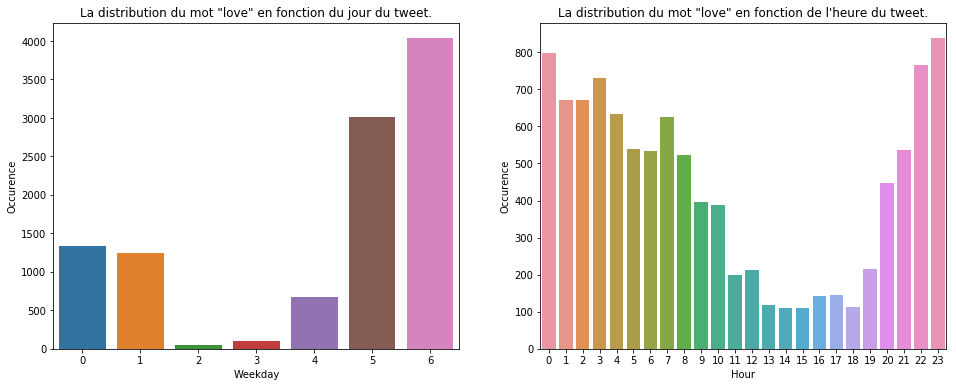

In [69]:
plot_word_in_time('love')

**Commentaire:** _Par exemple, si on prend le mot "love", on voit qu'il apparaît principalement dans les tweets du weeke-end et pendant la soirée ou la nuit._

### 2.3 Histogramme du nombre de mots les plus utilisés
    Dans cette section, on utilise Seaborn pour créer des histogrammes des mots les plus fréquemment utilisés dans les tweets.

#### 2.3.1 Histogramme des mots les plus fréquemment utilisés

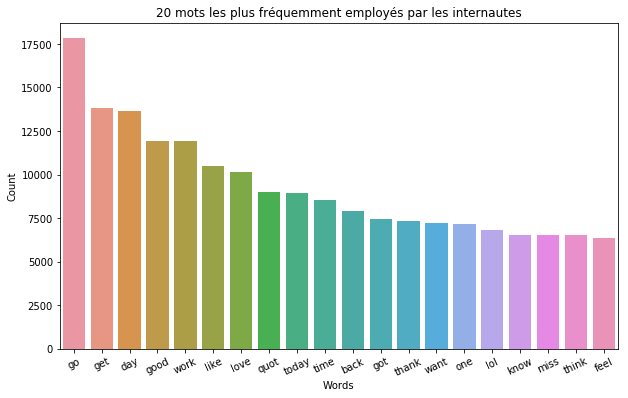

In [56]:
dico= Counter(text.split())
dico.most_common(20)
mots = [m[0] for m in dico.most_common(20)]
freq = [m[1] for m in dico.most_common(20)]

plt.figure(figsize= (10,6))
sns.barplot(x=mots, y=freq)
plt.title('20 mots les plus fréquemment employés par les internautes')
plt.xticks(rotation = 25)
plt.xlabel('Words')
plt.ylabel('Count');

#### 2.3.2 Histogramme des mots positifs les plus fréquemment utilisés

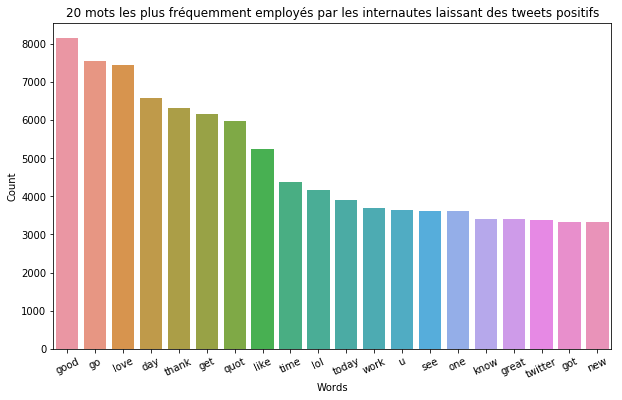

In [57]:
dico= Counter(text_pos.split())
dico_pos = dico.most_common(20)
mots_pos = [m[0] for m in dico_pos]
freq_pos = [m[1] for m in dico_pos]

plt.figure(figsize= (10,6))
sns.barplot(x=mots_pos, y=freq_pos)
plt.title('20 mots les plus fréquemment employés par les internautes laissant des tweets positifs')
plt.xticks(rotation = 25)
plt.xlabel('Words')
plt.ylabel('Count');

#### 2.3.3 Histogramme des mots négatifs les plus fréquemment utilisés

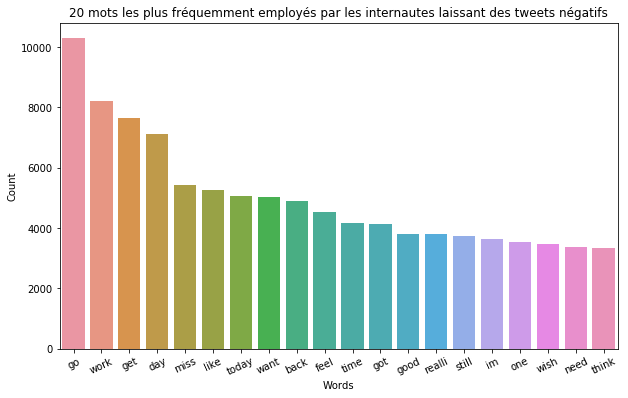

In [58]:
dico= Counter(text_neg.split())
dico_neg = dico.most_common(20)
mots_neg = [m[0] for m in dico_neg]
freq_neg = [m[1] for m in dico_neg]

plt.figure(figsize= (10,6))
sns.barplot(x=mots_neg, y=freq_neg)
plt.title('20 mots les plus fréquemment employés par les internautes laissant des tweets négatifs')
plt.xticks(rotation = 25)
plt.xlabel('Words')
plt.ylabel('Count');

**Commentaire:** _Les résultats affichés sur les histogrammes des mots les plus utilisés confirment ceux des nuages de mots._

### 2.4 Représentation avec Bokeh des mots les plus utilisés dans les tweets
    Dans cette section, on utilise Bokeh pour créer un graphique des mots les plus fréquemment utilisés dans les tweets.

#### 2.4.1 Création d'un DataFrame des mots positifs

In [59]:
liste_pos=[]
for mot in mots_pos:
    if mot not in stop_words:
        liste_pos.append(False)
    else: 
        liste_pos.append(True)
liste_pos

pos = {'mots': mots_pos, 'frequence': freq_pos,'mots_vides': liste_pos}
df_pos = pd.DataFrame(data=pos)
df_pos

,mots,frequence,mots_vides
0,good,8139,False
1,go,7546,False
2,love,7425,False
3,day,6564,True
4,thank,6313,False
5,get,6156,False
6,quot,5961,False
7,like,5248,False
8,time,4367,True
9,lol,4159,False


#### 2.4.2 Création d'un DataFrame des mots négatifs

In [60]:
liste_neg=[]
for mot in mots_neg:
    if mot not in stop_words:
        liste_neg.append(False)
    else: 
        liste_neg.append(True)
liste_neg
neg = {'mots': mots_neg, 'frequence': freq_neg,'mots_vides': liste_neg}
df_neg = pd.DataFrame(data=neg)
df_neg

,mots,frequence,mots_vides
0,go,10293,False
1,work,8221,True
2,get,7647,False
3,day,7113,True
4,miss,5421,False
5,like,5260,False
6,today,5064,True
7,want,5036,False
8,back,4882,False
9,feel,4525,False


#### 2.4.3 Représentation des mots les plus utilisés dans les tweets postifs et négatifs

In [61]:
pos = {'mots': mots_pos, 'frequence': freq_pos,'mots_vides': liste_pos}
df_pos = pd.DataFrame(data=pos)
neg = {'mots': mots_neg, 'frequence': freq_neg,'mots_vides': liste_neg}
df_neg = pd.DataFrame(data=neg)

source1=ColumnDataSource(df_pos)
source2=ColumnDataSource(df_neg)
hover = HoverTool(
        tooltips=[("index", "@index"),("Mot", "@mots"),("fréquence", "@frequence"),("mot vide", "@mots_vides")])

p1 = figure(plot_width=600, plot_height=600,x_axis_label='Mot', y_axis_label='Frequence')
p1.circle(x='index',y='frequence',source = source1,color='red',size=15)
p1.add_tools(hover)
tab1 = Panel(child=p1, title="Tweets positifs")

p2 = figure(plot_width=600, plot_height=600,x_axis_label='Mot', y_axis_label='Frequence')
p2.circle(x='index',y='frequence',source = source2,color='blue',size=15)
p2.add_tools(hover)
tab2 = Panel(child=p2, title="Tweets négatifs")

tabs = Tabs(tabs=[ tab2, tab1 ])
show(tabs)

**Commentaire:** _On a représenté ici dans deux onglets différents: l'un pour les tweets positifs et l'autre les tweets négatifs, les mots les plus utilisés selon la fréquence de leur apparition dans notre jeu de données. On remarque que plusieurs mots sont fréquents dans les 2 listes comme : "go","work","get","got","day" etc. Ce graphe nous indique également pour chaque mot: sa fréquence exacte et s'il fait partie des mots vides ou pas._